In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ca = pd.read_csv('../data/Initiated Building Permits (CA Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
fr = pd.read_csv('../data/Initiated Building Permits (FR Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
pl = pd.read_csv('../data/Initiated Building Permits (PL Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
pw = pd.read_csv('../data/Initiated Building Permits (PW Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
sw = pd.read_csv('../data/Initiated Building Permits (SW Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
ws = pd.read_csv('../data/Initiated Building Permits (WS Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
u_o = pd.read_csv('../data/Initiated Building Permits 3yr (Temp-Final U_O).csv',
                 parse_dates=['Date_Initiated','Date_Issued','Temp U&O Complete Date','Final U&O Complete Date'])
yr3 = pd.read_csv('../data/Initiated Building Permits 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued'])

In [93]:
yr3 = pd.read_csv('../data/Initiated Building Permits 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued'])
sw = pd.read_csv('../data/Initiated Building Permits (SW Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
ws = pd.read_csv('../data/Initiated Building Permits (WS Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'])
u_o = pd.read_csv('../data/Initiated Building Permits 3yr (Temp-Final U_O).csv',
                  parse_dates=['Date_Initiated','Date_Issued','Temp U&O Complete Date','Final U&O Complete Date'])

In [3]:
def isOneToOne(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [4]:
isOneToOne(yr3, 'SUB_TYPE', 'SUB_TYPE_DESC')

True

In [5]:
def pairedcol(df):
    
    for column in df.columns:
        for num in range(1, len(df.columns)):
            if isOneToOne(df, df.columns[num], column):
                print(str(df.columns[num]) + ' and ' + str(column) + "are one to one")


In [6]:
pairedcol(sw)

CASE_TYPE and CASE_TYPEare one to one
CASE_TYPE_DESC and CASE_TYPEare one to one
CASE_TYPE and CASE_TYPE_DESCare one to one
CASE_TYPE_DESC and CASE_TYPE_DESCare one to one
SUB_TYPE and SUB_TYPEare one to one
SUB_TYPE_DESC and SUB_TYPEare one to one
SUB_TYPE and SUB_TYPE_DESCare one to one
SUB_TYPE_DESC and SUB_TYPE_DESCare one to one
CONSTRUCTION COST and CONSTRUCTION COSTare one to one
Square Footage and Square Footageare one to one
STATUS_CODE and STATUS_CODEare one to one
Date_Initiated and Date_Initiatedare one to one
Date_Issued and Date_Issuedare one to one
TASK_CODE and TASK_CODEare one to one
TASK_DESC and TASK_CODEare one to one
TASK_CODE and TASK_DESCare one to one
TASK_DESC and TASK_DESCare one to one
RESULT_CODE and RESULT_CODEare one to one
RESULT_DESC and RESULT_CODEare one to one
RESULT_CODE and RESULT_DESCare one to one
RESULT_DESC and RESULT_DESCare one to one
Task_Complete_Date and Task_Complete_Dateare one to one


In [33]:
#start page information
df = sw

In [34]:
convert_dict = {'CASE_TYPE': 'category',
                'SUB_TYPE': 'category',
                'STATUS_CODE': 'category',
                'RESULT_CODE': 'category'
               }
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46102 entries, 0 to 46101
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PERMIT #            46102 non-null  object        
 1   CASE_TYPE           46102 non-null  category      
 2   CASE_TYPE_DESC      46102 non-null  object        
 3   SUB_TYPE            46102 non-null  category      
 4   SUB_TYPE_DESC       46102 non-null  object        
 5   CONSTRUCTION COST   46102 non-null  float64       
 6   Square Footage      46102 non-null  float64       
 7   STATUS_CODE         46102 non-null  category      
 8   Date_Initiated      46102 non-null  datetime64[ns]
 9   Date_Issued         44331 non-null  datetime64[ns]
 10  TASK_CODE           46102 non-null  object        
 11  TASK_DESC           46102 non-null  object        
 12  RESULT_CODE         46102 non-null  category      
 13  RESULT_DESC         46102 non-null  object    

In [117]:
df['deltatask'] = df['Task_Complete_Date'] - df['Date_Initiated']

In [118]:
df = df[~df['PERMIT #'].str.startswith('T','D')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44332 entries, 0 to 46101
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   PERMIT #            44332 non-null  object         
 1   CASE_TYPE           44332 non-null  category       
 2   CASE_TYPE_DESC      44332 non-null  object         
 3   SUB_TYPE            44332 non-null  category       
 4   SUB_TYPE_DESC       44332 non-null  object         
 5   CONSTRUCTION COST   44332 non-null  float64        
 6   Square Footage      44332 non-null  float64        
 7   STATUS_CODE         44332 non-null  category       
 8   Date_Initiated      44332 non-null  datetime64[ns] 
 9   Date_Issued         44330 non-null  datetime64[ns] 
 10  TASK_CODE           44332 non-null  object         
 11  TASK_DESC           44332 non-null  object         
 12  RESULT_CODE         44332 non-null  category       
 13  RESULT_DESC         44332 non-n

In [124]:
#finding which tasks are after Date Issued
df['postissuedtask'] = df['Task_Complete_Date'] > df['Date_Issued']
post_taskcode = df[['TASK_DESC','postissuedtask']].groupby(['TASK_DESC']).agg(['sum', 'count'])
#print(post_taskcode)
filter_posttaskcode = post_taskcode[post_taskcode.iloc[:,0] >= post_taskcode.iloc[:,1]*.95].reset_index()
filter_posttaskcode['TASK_DESC'].to_list()

['SWGR U&O Sign-off', 'U&O SW Flood Plain Final Approval - CA']

In [38]:
df_inspect = df[df['TASK_DESC'].isin(filter_posttaskcode)]
df_inspect

,PERMIT #,CASE_TYPE,CASE_TYPE_DESC,SUB_TYPE,SUB_TYPE_DESC,CONSTRUCTION COST,Square Footage,STATUS_CODE,Date_Initiated,Date_Issued,TASK_CODE,TASK_DESC,RESULT_CODE,RESULT_DESC,Task_Complete_Date,deltatask,postissuedtask
1774,2018000252,CARN,Building Residential - New,CAA01R301,Single Family Residence,155830.20,1492.0,DONE,2018-01-03,2018-01-03,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2018-04-02,89 days,True
1777,2018000315,CARN,Building Residential - New,CAA01R301,Single Family Residence,232837.13,2303.0,DONE,2018-01-03,2018-01-03,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2018-10-18,288 days,True
1782,2018000273,CARN,Building Residential - New,CAA01R301,Single Family Residence,232837.13,2303.0,DONE,2018-01-03,2018-01-03,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2018-10-18,288 days,True
1791,2018000522,CARN,Building Residential - New,CAA01R301,Single Family Residence,178956.81,1777.0,DONE,2018-01-04,2018-01-04,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2018-11-01,301 days,True
1794,2018000511,CARN,Building Residential - New,CAA01R301,Single Family Residence,248487.99,2579.0,DONE,2018-01-04,2018-01-04,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2018-11-01,301 days,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44438,2020046884,CARN,Building Residential - New,CAA01R301,Single Family Residence,115226.72,1173.0,DONE,2020-07-29,2021-01-14,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2021-05-26,301 days,True
44582,2020073452,CARN,Building Residential - New,CAA01R301,Single Family Residence,347110.12,2863.0,DONE,2020-11-23,2021-01-21,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2021-05-17,175 days,True
44758,2020018669,CARN,Building Residential - New,CAA14U009,"Accessory Structure, Garage",24343.20,504.0,ISSUE,2020-03-23,2021-01-26,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2021-03-26,368 days,True
45044,2020035199,CARN,Building Residential - New,CAA14U011,"Accessory Structure, Shed / Storage Bldg",4000.00,0.0,ISSUE,2020-06-08,2021-02-05,SWUGRADE,SWGR U&O Sign-off,APPROVED,Approved,2021-04-19,315 days,True


In [39]:
df_app = df[~df['TASK_DESC'].isin(filter_posttaskcode)]
df_app

,PERMIT #,CASE_TYPE,CASE_TYPE_DESC,SUB_TYPE,SUB_TYPE_DESC,CONSTRUCTION COST,Square Footage,STATUS_CODE,Date_Initiated,Date_Issued,TASK_CODE,TASK_DESC,RESULT_CODE,RESULT_DESC,Task_Complete_Date,deltatask,postissuedtask
0,2020011891,CARA,Building Residential - Addition,CAA01R301,Single Family Residence,25936.00,1236.0,OPEN,2020-02-24,NaT,SWGRADE,[D] Grading Plan Review For Bldg App,APPROVED,Approved,2020-02-25,1 days,False
1,2020011891,CARA,Building Residential - Addition,CAA01R301,Single Family Residence,25936.00,1236.0,OPEN,2020-02-24,NaT,SWFLDPLN,[C] Flood Plain Review On Blgd App,IGNORE,No sign-off needed on this project,2020-02-25,1 days,False
1771,2018000034,CARR,Building Residential - Rehab,CAA01R301,Single Family Residence,45000.00,0.0,DONE,2018-01-02,2018-01-02,SWFLDPLN,[C] Flood Plain Review On Blgd App,IGNORE,No sign-off needed on this project,2018-01-02,0 days,False
1772,2018000151,CARA,Building Residential - Addition,CAA14U015,"Accessory Structure, Decks",29232.65,655.0,DONE,2018-01-02,2018-01-02,SWFLDPLN,[C] Flood Plain Review On Blgd App,IGNORE,No sign-off needed on this project,2018-01-02,0 days,False
1773,2018000151,CARA,Building Residential - Addition,CAA14U015,"Accessory Structure, Decks",29232.65,655.0,DONE,2018-01-02,2018-01-02,SWGRADE,[D] Grading Plan Review For Bldg App,APPROVED,Approved,2018-01-02,0 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,2020068782,CARN,Building Residential - New,CAA14U009,"Accessory Structure, Garage",43904.70,909.0,ISSUE,2020-11-02,2021-05-28,SWGRADE,[D] Grading Plan Review For Bldg App,COND,Approved with Comments,2020-11-04,2 days,False
46098,2020070844,CARN,Building Residential - New,CAA01R301,Single Family Residence,160279.28,1322.0,ISSUE,2020-11-11,2021-05-29,SWGRADE,[D] Grading Plan Review For Bldg App,COND,Approved with Comments,2020-12-11,30 days,False
46099,2020070844,CARN,Building Residential - New,CAA01R301,Single Family Residence,160279.28,1322.0,ISSUE,2020-11-11,2021-05-29,SWFLDPLN,[C] Flood Plain Review On Blgd App,IGNORE,No sign-off needed on this project,2020-12-01,20 days,False
46100,2020070845,CARN,Building Residential - New,CAA01R301,Single Family Residence,160279.28,1322.0,ISSUE,2020-11-11,2021-05-29,SWGRADE,[D] Grading Plan Review For Bldg App,COND,Approved with Comments,2020-12-11,30 days,False


In [40]:
df_app[['PERMIT #','RESULT_CODE', 'TASK_DESC' ]].groupby(['PERMIT #', 'TASK_DESC']).count().sort_values('RESULT_CODE', ascending=False).head(20)


,,RESULT_CODE
PERMIT #,TASK_DESC,
2018043059,[D] Grading Plan Review For Bldg App,6
2019006623,[D] Grading Plan Review For Bldg App,4
2018043062,[D] Grading Plan Review For Bldg App,4
2019061536,[D] Grading Plan Review For Bldg App,4
2018043056,[D] Grading Plan Review For Bldg App,4
2018043053,[D] Grading Plan Review For Bldg App,4
2019071674,[D] Grading Plan Review For Bldg App,4
2020014886,[D] Grading Plan Review For Bldg App,3
2020024993,[D] Grading Plan Review For Bldg App,3


In [64]:
df_last = df_app.sort_values(by=['Task_Complete_Date','RESULT_DESC'], ascending=[False,True]).drop_duplicates(subset=['PERMIT #', 'TASK_CODE'], keep='first')
df_last


,PERMIT #,CASE_TYPE,CASE_TYPE_DESC,SUB_TYPE,SUB_TYPE_DESC,CONSTRUCTION COST,Square Footage,STATUS_CODE,Date_Initiated,Date_Issued,TASK_CODE,TASK_DESC,RESULT_CODE,RESULT_DESC,Task_Complete_Date,deltatask,postissuedtask
46089,2020064354,CARN,Building Residential - New,CAA01R301,Single Family Residence,226656.08,2062.0,ISSUE,2020-10-13,2021-05-27,SWGRADE,[D] Grading Plan Review For Bldg App,COND,Approved with Comments,2021-05-27,226 days,False
46091,2020061840,CACN,Building Commercial - New,CAF20M001,"Retail, Department / Retail Stores",933551.04,7428.0,ISSUE,2020-10-01,2021-05-27,SWGRADE,[D] Grading Plan Review For Bldg App,COND,Approved with Comments,2021-05-24,235 days,False
46094,2019000434,CACH,Building Commercial - Shell,CAF20M001,"Retail, Department / Retail Stores",1144355.85,15147.0,ISSUE,2019-01-03,2021-05-27,SWGRADE,[D] Grading Plan Review For Bldg App,COND,Approved with Comments,2021-05-24,872 days,False
46071,2020077726,CACA,Building Commercial - Addition,CAC03A315,"Community Education, Libraries",1500000.00,0.0,ISSUE,2020-12-14,2021-05-21,SWGRADE,[D] Grading Plan Review For Bldg App,APPROVED,Approved,2021-05-21,158 days,False
46072,2020077726,CACA,Building Commercial - Addition,CAC03A315,"Community Education, Libraries",1500000.00,0.0,ISSUE,2020-12-14,2021-05-21,SWFLDPLN,[C] Flood Plain Review On Blgd App,APPROVED,Approved,2021-05-21,158 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,2018000214,CARN,Building Residential - New,CAA01R301,Single Family Residence,180240.00,1600.0,ISSUE,2018-01-02,2018-02-21,SWFLDPLN,[C] Flood Plain Review On Blgd App,IGNORE,No sign-off needed on this project,2018-01-03,1 days,False
2798,2018000213,CARN,Building Residential - New,CAA01R301,Single Family Residence,136535.20,1840.0,DONE,2018-01-02,2018-02-21,SWFLDPLN,[C] Flood Plain Review On Blgd App,IGNORE,No sign-off needed on this project,2018-01-03,1 days,False
1773,2018000151,CARA,Building Residential - Addition,CAA14U015,"Accessory Structure, Decks",29232.65,655.0,DONE,2018-01-02,2018-01-02,SWGRADE,[D] Grading Plan Review For Bldg App,APPROVED,Approved,2018-01-02,0 days,False
1771,2018000034,CARR,Building Residential - Rehab,CAA01R301,Single Family Residence,45000.00,0.0,DONE,2018-01-02,2018-01-02,SWFLDPLN,[C] Flood Plain Review On Blgd App,IGNORE,No sign-off needed on this project,2018-01-02,0 days,False


In [65]:
df_last.RESULT_CODE.value_counts()


APPROVED     20216
COND          9088
IGNORE        6464
QUALIFIED        1
REJECTED         1
SWISSUED         1
HOLD             0
NOT APPR         0
TEMP             0
Name: RESULT_CODE, dtype: int64

In [43]:
df_last = df_last.astype({'deltatask':"timedelta64[D]"})

<AxesSubplot:xlabel='deltatask', ylabel='Count'>

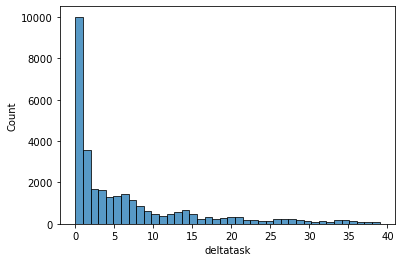

In [44]:
df_plot = df_last[df_last['deltatask']<40]
sns.histplot(data=df_plot, x='deltatask', bins=40)

In [48]:
df_last[df_last.RESULT_CODE == 'REJECTED']

,PERMIT #,CASE_TYPE,CASE_TYPE_DESC,SUB_TYPE,SUB_TYPE_DESC,CONSTRUCTION COST,Square Footage,STATUS_CODE,Date_Initiated,Date_Issued,TASK_CODE,TASK_DESC,RESULT_CODE,RESULT_DESC,Task_Complete_Date,deltatask,postissuedtask
45903,2020070996,CACR,Building Commercial - Rehab,CAD02B016,"General Office, Professional Services",125000.00,0.0,ISSUE,2020-11-12,2021-04-12,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2021-03-26,134 days,False
45261,2020079432,CARA,Building Residential - Addition,CAA01R301,Single Family Residence,50590.84,744.0,ISSUE,2020-12-21,2021-02-17,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2021-02-08,49 days,False
44386,2020077860,CARN,Building Residential - New,CAA02R302,Duplex,298432.26,2590.0,ISSUE,2020-12-14,2021-01-13,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2021-01-05,22 days,False
43445,2020075248,CARA,Building Residential - Addition,CAA01R301,Single Family Residence,113723.12,938.0,ISSUE,2020-12-02,2020-12-11,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2020-12-10,8 days,False
43467,2020071299,CARN,Building Residential - New,CAA01R301,Single Family Residence,163189.04,1346.0,ISSUE,2020-11-13,2020-12-14,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2020-11-30,17 days,False
43464,2020065956,CARN,Building Residential - New,CAA14U009,"Accessory Structure, Garage",17729.28,576.0,ISSUE,2020-10-20,2020-12-14,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2020-11-23,34 days,False
43122,2020067844,CARA,Building Residential - Addition,CAA14U015,"Accessory Structure, Decks",185856.00,600.0,ISSUE,2020-10-28,2020-12-04,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2020-11-20,23 days,False
42626,2020069271,CARN,Building Residential - New,CAA14U004,"Accessory Structure, Carport",30000.00,0.0,ISSUE,2020-11-04,2020-11-19,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2020-11-09,5 days,False
44180,2020054279,CARN,Building Residential - New,CAA01R301,Single Family Residence,777390.88,6412.0,ISSUE,2020-08-30,2021-01-07,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2020-10-14,45 days,False
39231,2020046537,CARA,Building Residential - Addition,CAA01R301,Single Family Residence,34000.00,0.0,ISSUE,2020-07-28,2020-08-26,SWGRADE,[D] Grading Plan Review For Bldg App,REJECTED,Rejected,2020-08-25,28 days,False


In [101]:
df_pivot = pd.pivot_table(df_plot, values='deltatask', index=['CASE_TYPE_DESC'], aggfunc=[np.mean, np.median, np.min, np.max, np.std, np.var], margins = True)

In [102]:
print(df_pivot)

                                               mean    median      amin  \
                                          deltatask deltatask deltatask   
CASE_TYPE_DESC                                                            
Building Commercial - Addition             7.354286       1.0       0.0   
Building Commercial - Change Contractor    3.666667       2.0       2.0   
Building Commercial - Fire Damage          2.571429       0.0       0.0   
Building Commercial - Foundation           9.938462       8.0       0.0   
Building Commercial - New                  9.750501       5.0       0.0   
Building Commercial - Rehab                6.221372       0.0       0.0   
Building Commercial - Roofing / Siding     1.705128       0.0       0.0   
Building Commercial - Shell               14.132530      10.0       0.0   
Building Commercial - Structural Frame    23.222222      30.0       1.0   
Building Commercial - Tenant Finish Out    5.330532       2.0       0.0   
Building Commercial New S

In [63]:
df_pivot.to_csv('out.csv', index=True)

In [66]:
filter_posttaskcode


Index(['SWGR U&O Sign-off', 'U&O SW Flood Plain Final Approval - CA'], dtype='object', name='TASK_DESC')

In [94]:
u_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14160 entries, 0 to 14159
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PERMIT #                 14160 non-null  int64         
 1   CASE_TYPE                14160 non-null  object        
 2   CASE_TYPE_DESC           14160 non-null  object        
 3   SUB_TYPE                 14160 non-null  object        
 4   SUB_TYPE_DESC            14160 non-null  object        
 5   STATUS_CODE              14160 non-null  object        
 6   Date_Initiated           14160 non-null  datetime64[ns]
 7   Date_Issued              14160 non-null  datetime64[ns]
 8   TASK_CODE                14160 non-null  object        
 9   TASK_DESC                14160 non-null  object        
 10  Temp U&O Complete Date   1797 non-null   datetime64[ns]
 11  Final U&O Complete Date  13580 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(1), 

In [95]:
u_o['projectlen'] = u_o.iloc[:,11] - u_o.iloc[:,6]

In [97]:
u_o = u_o.astype({'projectlen':"timedelta64[D]"})
u_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14160 entries, 0 to 14159
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PERMIT #                 14160 non-null  int64         
 1   CASE_TYPE                14160 non-null  object        
 2   CASE_TYPE_DESC           14160 non-null  object        
 3   SUB_TYPE                 14160 non-null  object        
 4   SUB_TYPE_DESC            14160 non-null  object        
 5   STATUS_CODE              14160 non-null  object        
 6   Date_Initiated           14160 non-null  datetime64[ns]
 7   Date_Issued              14160 non-null  datetime64[ns]
 8   TASK_CODE                14160 non-null  object        
 9   TASK_DESC                14160 non-null  object        
 10  Temp U&O Complete Date   1797 non-null   datetime64[ns]
 11  Final U&O Complete Date  13580 non-null  datetime64[ns]
 12  projectlen               13580 n

In [100]:
pd.pivot_table(u_o, values='projectlen', index='CASE_TYPE_DESC', aggfunc=[np.mean, np.median], margins=True)

,mean,median
,projectlen,projectlen
CASE_TYPE_DESC,,
Building Commercial - Addition,345.861538,337.0
Building Commercial - Change Contractor,155.333333,80.0
Building Commercial - Fire Damage,348.166667,361.0
Building Commercial - Foundation,601.727273,745.0
Building Commercial - New,529.902724,523.0
Building Commercial - Rehab,256.799877,221.0
Building Commercial - Roofing / Siding,254.714286,295.0
Building Commercial - Shell,619.322034,570.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31100 entries, 45385 to 1771
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PERMIT #            31100 non-null  object        
 1   CASE_TYPE           31100 non-null  category      
 2   CASE_TYPE_DESC      31100 non-null  object        
 3   SUB_TYPE            31100 non-null  category      
 4   SUB_TYPE_DESC       31100 non-null  object        
 5   CONSTRUCTION COST   31100 non-null  float64       
 6   Square Footage      31100 non-null  float64       
 7   STATUS_CODE         31100 non-null  category      
 8   Date_Initiated      31100 non-null  datetime64[ns]
 9   Date_Issued         31098 non-null  datetime64[ns]
 10  TASK_CODE           31100 non-null  object        
 11  TASK_DESC           31100 non-null  object        
 12  RESULT_CODE         31100 non-null  category      
 13  RESULT_DESC         31100 non-null  object 

In [103]:
filter_posttaskcode

Index(['SWGR U&O Sign-off', 'U&O SW Flood Plain Final Approval - CA'], dtype='object', name='TASK_DESC')

In [107]:
tempdf = pd.DataFrame({'sw': filter_posttaskcode})

,sw
0,SWGR U&O Sign-off
1,U&O SW Flood Plain Final Approval - CA


In [113]:
task_filter['test'] = filter_posttaskcode


In [114]:
task_filter

,test
0,SWGR U&O Sign-off
1,U&O SW Flood Plain Final Approval - CA


In [110]:
task_filter = pd.DataFrame()


In [115]:
task_filter['string'] = 'try'

In [116]:
task_filter

,test,string
0,SWGR U&O Sign-off,try
1,U&O SW Flood Plain Final Approval - CA,try
